https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.loc[df.TotalCharges == ' ', 'TotalCharges'] = 'unknown'
df.Churn = df.Churn.map({'No': 0, 'Yes': 1}).astype(int)

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [6]:
df.select_dtypes(include=object).describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


Процент ушедших в разбивке по категориям. Т.е. 40% от всех пользователей, заключивших контрак с помесячной оплатой, ушли и, например, ~12%  от заключивших контрак на год.

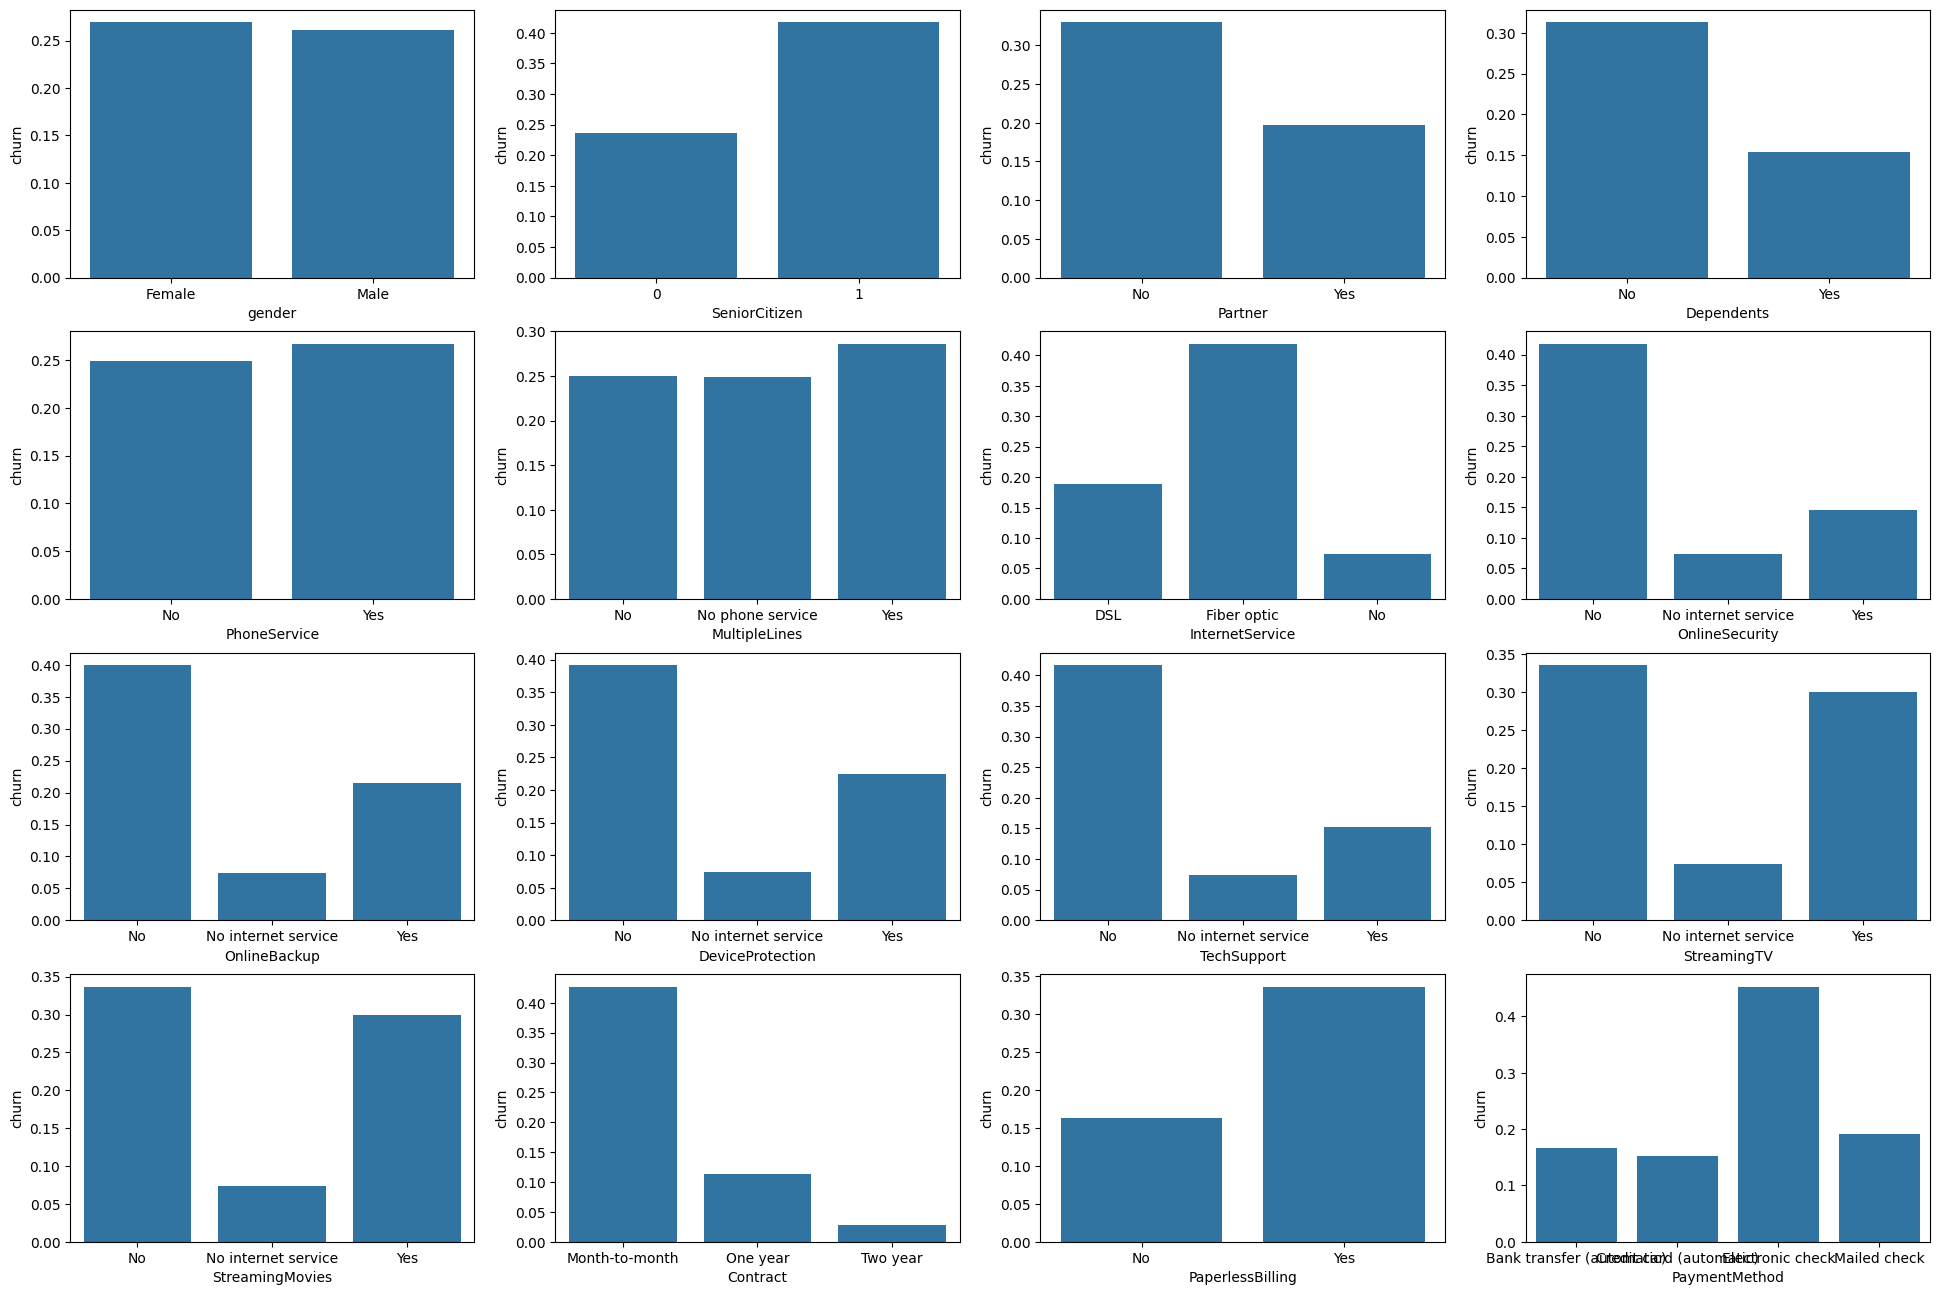

In [7]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
n = len(categorical)

fig, ax = plt.subplots(n//4 + int(n%4), 4, figsize=(24, 16))

for i, category in enumerate(categorical):
    sns.barplot(data=df.groupby(category, as_index=False).agg(churn=('Churn', pd.Series.mean)), x=category, y='churn', ax=ax[i//4, i%4])

Глядя на эти графики, уже можно сделать ряд выводов. Например, лучше всего заключать длительные контракты, потому что доля ушедших у них меньше в несколько раз. Пенсионеры чаще уходят в процентном соотношении, чем молодежь.


Распределение ушедших в зависимости от стоимости месячной платы.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

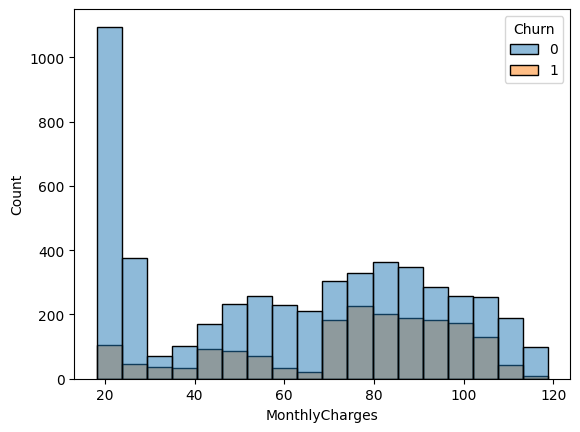

In [8]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Распределение кол-ва пользователей, решивших уйти на n месяц, в зависимости от того, пенсионер ли он.

<Axes: xlabel='tenure', ylabel='churn'>

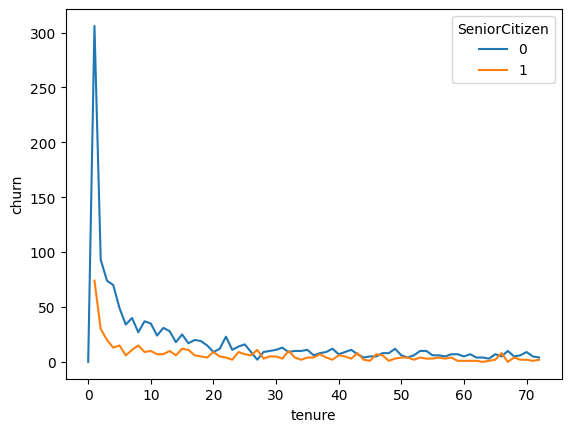

In [10]:
sns.lineplot(data=df.groupby(['SeniorCitizen', 'tenure'], as_index=False).agg(churn=('Churn',  pd.Series.sum)), x='tenure', y='churn', hue='SeniorCitizen')

Посчитаем, так называемый, hazard_rate, т.е. количество пользователей, ушедших именно в месяц t. Считается эта метрика следующим образом:

$$
h(t) = \frac{\#\{\text{churn = 1 \& tenure=t}\}}{\#\{\text{tenure} \geq \text{t}\}}
$$

Ну и посчитаем заодно survival rate, т.е. $S(t) = P(\text{вероятность дожить до t})$

In [11]:
hazard = []
for tenure in np.sort(df.tenure.unique()):
    churn_at_t = df[(df.tenure == tenure) & (df.Churn == 1)].tenure.size
    at_risk = df[df.tenure >= tenure].tenure.size

    hazard.append({
        'tenure': tenure,
        'churn_at_t': churn_at_t,
        'at_risk': at_risk,
        'hazard_rate': churn_at_t / at_risk
    })
hazard = pd.DataFrame(hazard)
hazard['survival_rate'] = (1 - hazard['hazard_rate']).cumprod()

hazard

,tenure,churn_at_t,at_risk,hazard_rate,survival_rate
0,0,0,7043,0.000000,1.000000
1,1,380,7032,0.054039,0.945961
2,2,123,6419,0.019162,0.927835
3,3,94,6181,0.015208,0.913725
4,4,83,5981,0.013877,0.901045
...,...,...,...,...,...
68,68,9,846,0.010638,0.626858
69,69,8,746,0.010724,0.620135
70,70,11,651,0.016897,0.609657
71,71,6,532,0.011278,0.602781


<Axes: xlabel='tenure', ylabel='survival_rate'>

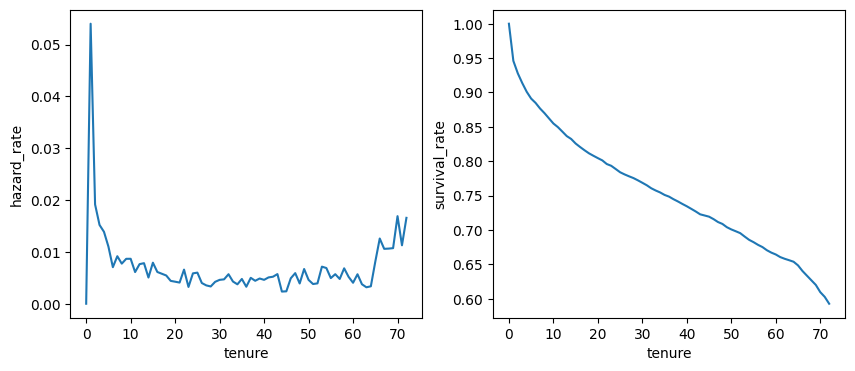

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(data=hazard, x='tenure', y='hazard_rate', ax=ax[0])
sns.lineplot(data=hazard, x='tenure', y='survival_rate', ax=ax[1])

---

Посмотрим на распределение ушедших пользователей в разбивке на кол-во месяцев в подписке и месячную плату.

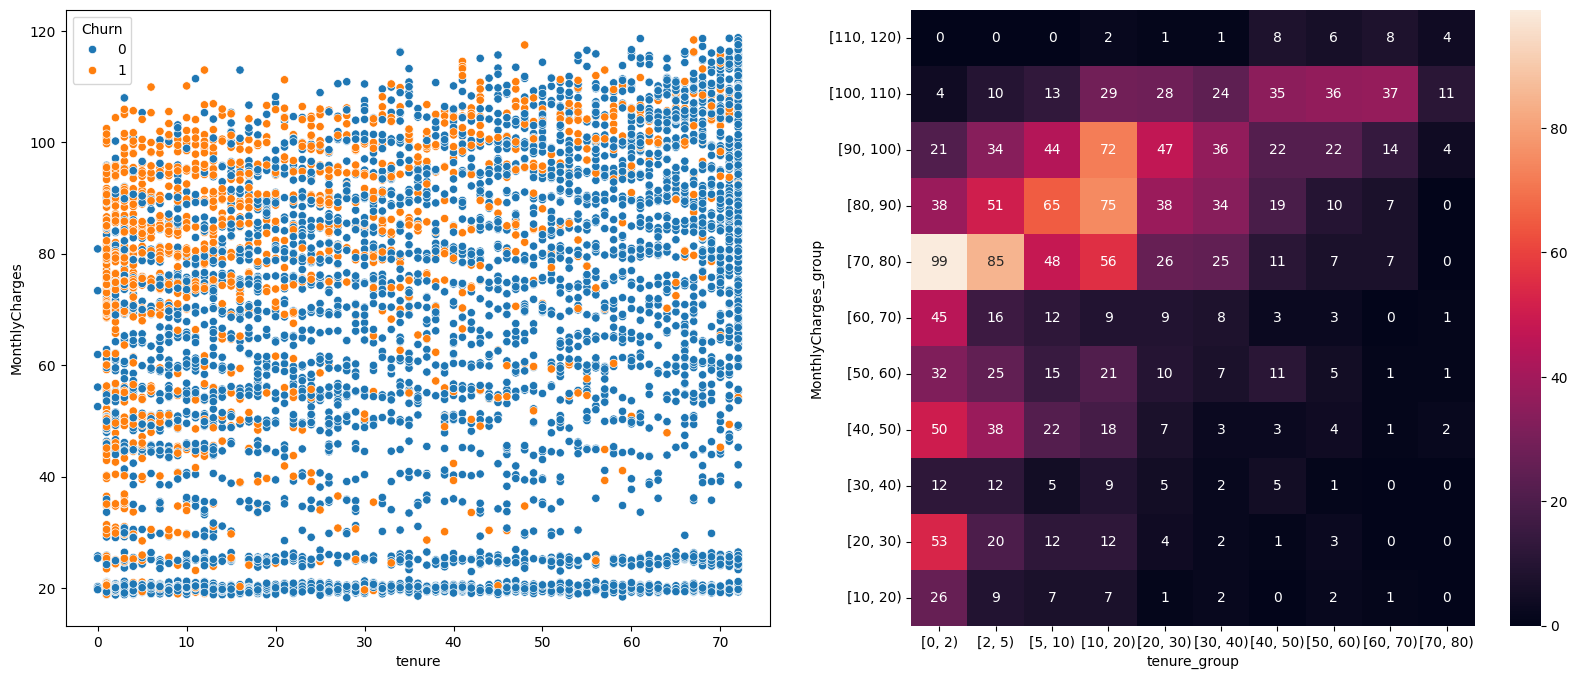

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

bins_tenure = [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80]
labels_tenure =[f'[{bins_tenure[i]}, {bins_tenure[i+1]})' for i in range(0, len(bins_tenure)-1)]

bins_mc = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_mc =[f'[{bins_mc[i]}, {bins_mc[i+1]})' for i in range(0, len(bins_mc)-1)]

df['tenure_group'] = pd.cut(df['tenure'], bins=bins_tenure, labels=labels_tenure, right=False)
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=bins_mc, labels=labels_mc, right=False)

pt = pd.pivot_table(
    data=df, 
    index='MonthlyCharges_group', 
    columns='tenure_group', 
    values='Churn', 
    aggfunc=pd.Series.sum, 
    observed=True, 
    fill_value=0
)

sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=ax[0])

ax = sns.heatmap(pt, annot=True, ax=ax[1])
ax.invert_yaxis()


<Axes: xlabel='tenure', ylabel='churn'>

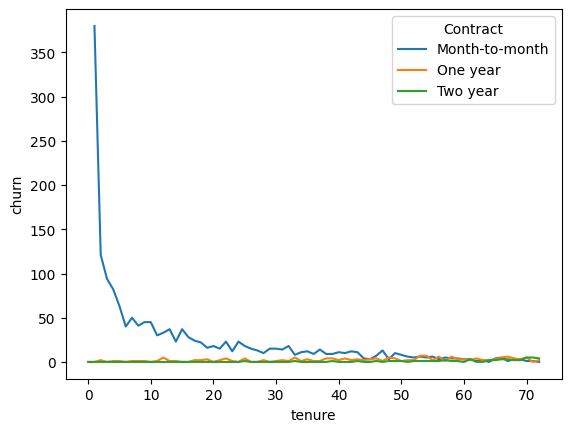

In [14]:
sns.lineplot(data=df.groupby(['Contract', 'tenure'], as_index=False).agg(churn=('Churn', pd.Series.sum)), x='tenure', y='churn', hue='Contract')

---

Посмотрим на процент ушедших пользователей в разбивке на количество подлкюченых дополнительных услуг.

In [15]:
df['lockin_services'] = np.sum(df.loc[:, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes', axis=1)

,lockin_services,churn
0,0,0.214060
1,1,0.457557
2,2,0.358180
3,3,0.273703
4,4,0.223005
5,5,0.124343
6,6,0.052817


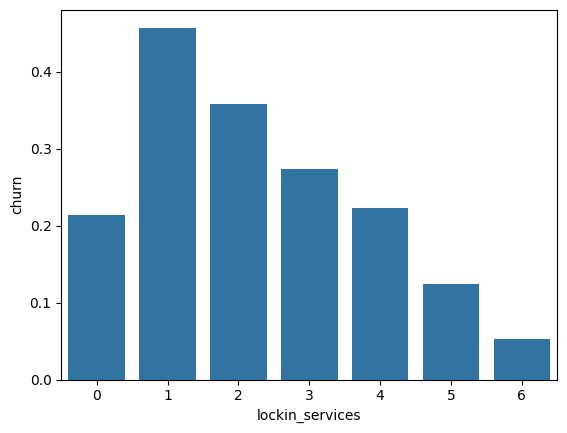

In [16]:
ax = df.groupby('lockin_services', as_index=False).agg(churn=('Churn', 'mean'))
sns.barplot(data=ax, x='lockin_services', y='churn')

ax

Можно увидеть, что чем больше дополнительных услуг у пользователя, тем с vвероятностью он уйдет.

<Axes: xlabel='sec_services', ylabel='churn'>

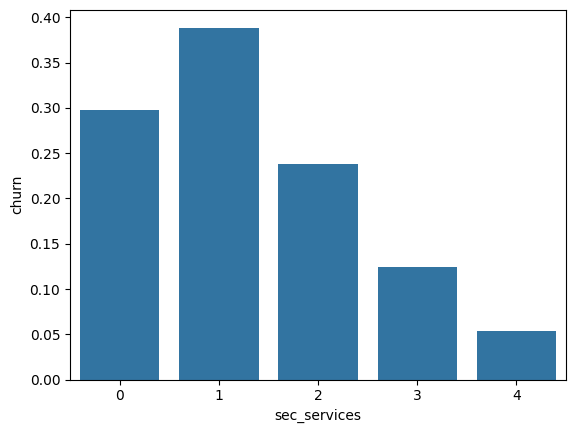

In [20]:
df['sec_services'] = np.sum(df.loc[:, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']] == 'Yes', axis=1)

ax = df.groupby('sec_services', as_index=False).agg(churn=('Churn', 'mean'))
sns.barplot(data=ax, x='sec_services', y='churn')

Чем больше защитных услуг, тем меньше вероятность ухода.

<Axes: xlabel='steaming_services', ylabel='churn'>

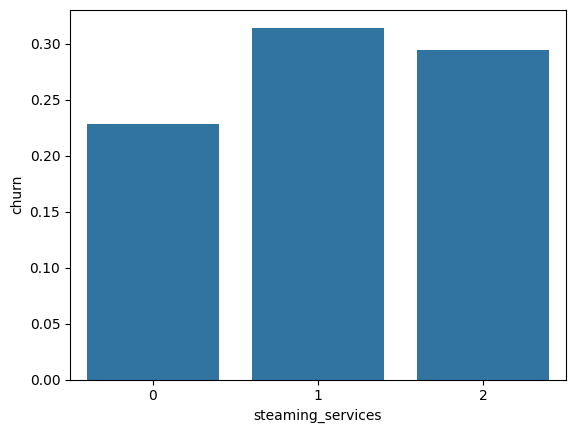

In [44]:
df['steaming_services'] = np.sum(df.loc[:, [ 'StreamingTV', 'StreamingMovies']] == 'Yes', axis=1)
df['steaming_services_flag'] = df.steaming_services > 0
ax = df.groupby('steaming_services', as_index=False).agg(churn=('Churn', 'mean'))
sns.barplot(data=ax, x='steaming_services', y='churn')

In [37]:
stats.chi2_contingency(pd.crosstab(df.steaming_services, df.Churn))

Chi2ContingencyResult(statistic=np.float64(52.894771262506175), pvalue=np.float64(3.2662269626411298e-12), dof=2, expected_freq=array([[2603.52917791,  940.47082209],
       [1145.28837143,  413.71162857],
       [1425.18245066,  514.81754934]]))

In [38]:
df.steaming_services = df.steaming_services > 0

In [41]:
stats.chi2_contingency(pd.crosstab(df.steaming_services_flag, df.Churn))

Chi2ContingencyResult(statistic=np.float64(50.740591762430526), pvalue=np.float64(1.0541667201283859e-12), dof=1, expected_freq=array([[2603.52917791,  940.47082209],
       [2570.47082209,  928.52917791]]))

In [45]:
stats.chi2_contingency(pd.crosstab(df[df.steaming_services != 0].steaming_services, df.Churn))

Chi2ContingencyResult(statistic=np.float64(1.5390521642499833), pvalue=np.float64(0.21475894375821156), dof=1, expected_freq=array([[1086.26521863,  472.73478137],
       [1351.73478137,  588.26521863]]))

- Hazard оттока максимален в первые 1–3 месяца и убывает со временем

- Клиенты с контрактом Month-to-month имеют более высокий риск оттока

- Наличие защитных add-on услуг снижает вероятность churn

- Пользователи с хотябы одной подключенной Streaming-услугой имеют статистически значимо более высокий риск оттока. Количество подключенных streaming-услуг на отток не влияет, если учитывать только предоставленные данные.